### Data Science Project: LSTM

#### Setting up system

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

#### Loading and pre-processing data

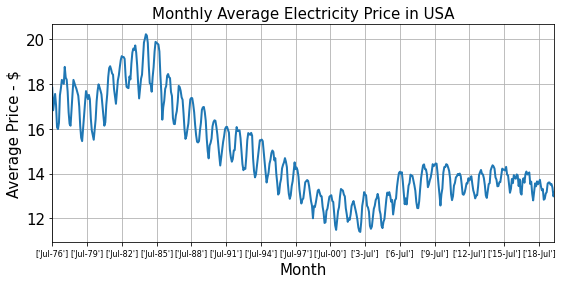

In [7]:
# load the dataset
dataframe = pandas.read_csv('price.csv', usecols=[2], engine='python')
my_xticks = pandas.read_csv('price.csv', usecols=[1], engine='python')

dataset = dataframe.values
dataset = dataset.astype('float32')
my_xticks = my_xticks.values
my_xticks = my_xticks.astype('str')

#print(plt.rcParams.get('figure.figsize'))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.plot(dataset,label='Real data',lw=2)

x = numpy.linspace(0,504,15)
x = x.astype(int)
my_xticks = [my_xticks[y] for y in x]
plt.xticks(x, my_xticks)

plt.xlabel('Month',fontsize=15)
plt.ylabel('Average Price - $',fontsize=15)
plt.title('Monthly Average Electricity Price in USA',fontsize=15)
plt.grid(b=None, which='major', axis='both')
plt.xlim([0,520])
plt.xticks(fontsize=8)
plt.yticks(fontsize=15)

plt.savefig('data.png', dpi=600)
plt.show()

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.794)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#### Creating, training and testing the RNN/LSTM network

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
418/418 - 1s - loss: 0.1118
Epoch 2/10
418/418 - 1s - loss: 0.0345
Epoch 3/10
418/418 - 1s - loss: 0.0209
Epoch 4/10
418/418 - 1s - loss: 0.0098
Epoch 5/10
418/418 - 1s - loss: 0.0040
Epoch 6/10
418/418 - 1s - loss: 0.0022
Epoch 7/10
418/418 - 1s - loss: 0.0020
Epoch 8/10
418/418 - 1s - loss: 0.0021
Epoch 9/10
418/418 - 1s - loss: 0.0020
Epoch 10/10
418/418 - 1s - loss: 0.0020


In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#### Results visualization

In [11]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0][0:-1], trainPredict[1:,0]))
#print('Train Score: %.4f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(testY[0][0:-1],testPredict[1:,0]))
#print('Test Score: %.4f RMSE' % (testScore))

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict))
print('Train Score: %.4f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0],testPredict))
print('Test Score: %.4f RMSE' % (testScore))

Train Score: 0.3936 RMSE
Test Score: 0.2496 RMSE


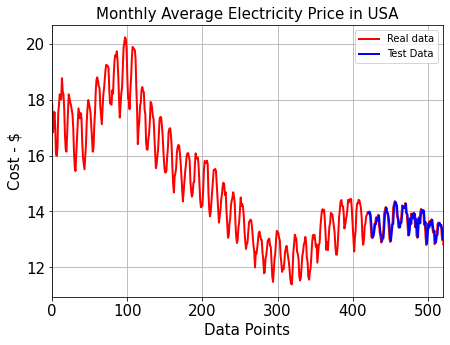

In [12]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions

#print(plt.rcParams.get('figure.figsize'))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.plot(scaler.inverse_transform(dataset),label='Real data',color='red',lw=2)
#plt.plot(trainPredictPlot,label='Train Data',color='green')
plt.plot(testPredictPlot,label='Test Data',color='blue',lw=2)

#plt.xticks(x, my_xticks)

plt.xlabel('Data Points',fontsize =15)
plt.ylabel('Cost - $',fontsize =15)
plt.title('Monthly Average Electricity Price in USA',fontsize =15)
plt.grid(b=None, which='major', axis='both')
plt.legend()
plt.xlim([0,520])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('LSTM.png', dpi=600)
plt.show()

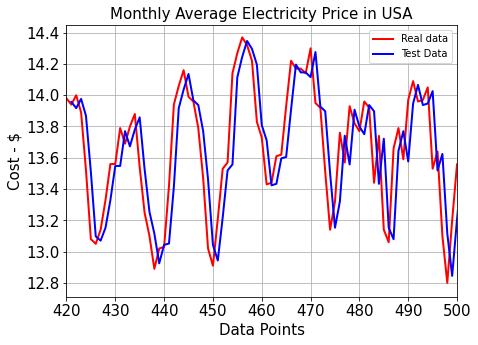

In [16]:
# plot baseline and predictions

#print(plt.rcParams.get('figure.figsize'))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

OriginalPlot = scaler.inverse_transform(dataset)

OriginalPlot_new = OriginalPlot[420:525,:]
trainPredictPlot_new = trainPredictPlot[420:525,:]
testPredictPlot_new = testPredictPlot[420:525,:]

plt.plot(range(420,525),OriginalPlot_new,label='Real data',color='red',lw=2)
#plt.plot(trainPredictPlot_new,label='Train Data')
plt.plot(range(420,525),testPredictPlot_new,label='Test Data',color='blue',lw=2)

#plt.xticks(x, my_xticks)

plt.xlabel('Data Points',fontsize =15)
plt.ylabel('Cost - $',fontsize =15)
plt.title('Monthly Average Electricity Price in USA',fontsize =15)
plt.grid(b=None, which='major', axis='both')
plt.legend()
plt.xlim([420,500])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('LSTM_Zoom.png', dpi=600)
plt.show()

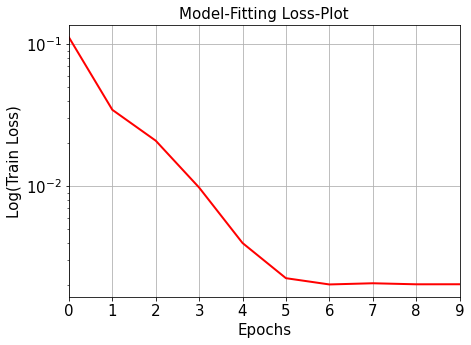

In [14]:
labels = ["loss"]
for lab in labels:
    plt.plot(history.history[lab],color='red',lw=2)

#print(plt.rcParams.get('figure.figsize'))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 7
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.yscale("log")
plt.xlabel('Epochs',fontsize =15)
plt.ylabel('Log(Train Loss)',fontsize =15)
plt.title('Model-Fitting Loss-Plot',fontsize =15)
plt.grid(b=None, which='major', axis='both')

plt.xlim([0,9])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('Loss.png', dpi=600)
plt.show()

In [15]:
import csv
with open('data.csv', 'w',newline='') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)
        
    # writing the data rows
    csvwriter.writerows(testPredictPlot) 